### Pregunta 7: Evaluación práctica: Diseño de un controlador PID.

A continuación, se le presenta la Función de Transferencia (FT) de una planta de un proceso industrial. Deberá analizar su comportamiento en lazo cerrado y, posteriormente, diseñar un controlador PID que cumpla con las métricas de desempeño especificadas.

La función de transferencia de la planta es:

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$

---
#### Parte 1: Análisis del sistema base (en una celda de Python).

Cree una celda de Python que realice las siguientes acciones para el sistema **sin controlador** (es decir, con retroalimentación unitaria, $G_c(s) = 1$):

1.  Defina la FT de la planta $G_p(s)$.
2.  Obtenga el sistema de la FT de lazo cerrado:
$$G_{LC}(s) = \frac{G_p(s)}{1 + G_p(s)}$$
3.  Imprima en pantalla la $G_{LC}(s)$ y sus polos  (`ct.poles()`).
4.  Genere el mapa de polos y ceros (`ct.pzmap()`).
5.  Grafique la respuesta al escalón unitario (simule por 5 segundos, `T=np.linspace(0, 5, 501)`).
6.  Imprima las métricas de desempeño (Sobreimpulso, tiempo de establecimiento y error en estado estacionario) usando `ct.step_info()` y el valor final de la respuesta.

---


#### Parte 2: Proceso de diseño del PID (en una celda de Markdown).

Observe las métricas de la Parte 1. Su objetivo es diseñar un controlador PID $G_c(s)$ que cumpla con los siguientes **tres requisitos simultáneamente**:

* **Error en estado estacionario ($e_{ss}$):** Cero.
* **Sobreimpulso (Overshoot):** Menor al 5%.
* **Tiempo de establecimiento (al 2%):** Menor a 1.0 segundo.

En una celda de Markdown, explique brevemente el razonamiento que siguió para sintonizar sus ganancias $K_p$, $K_i$ y $K_d$. 

---


#### Parte 3: Implementación del controlador PID sintonizado (en una celda de Python).

Cree una segunda celda de Python que contenga su diseño final. Esta celda debe:

1.  Definir las ganancias $K_p$, $K_i$ y $K_d$ que usted eligió en la Parte 2.
2.  Crear la FT del controlador PID:
$$G_c(s) = \frac{K_d s^2 + K_p s + K_i}{s}$$
3.  Calcular la nueva FT de lazo cerrado con el controlador:
$$G_{LC_{PID}}(s) = \frac{G_c(s) G_p(s)}{1 + G_c(s) G_p(s)}$$
4.  Imprimir la $G_{LC_{PID}}(s)$ y sus nuevos polos.
5.  Generar el mapa de polos y ceros del sistema controlado.
6.  Graficar en una misma figura la respuesta del sistema base (de la Parte 1) y la respuesta de su nuevo sistema con PID sintonizado (simule por 5 segundos).
7.  Imprimir las métricas de desempeño finales para verificar que cumple con los tres requisitos.

---


#### Entrega:

Comparta el enlace de su notebook en su repositorio de GitHub, asegurándose de que los resultados de la ejecución de las celdas (gráficas, impresiones) sean visibles.

In [ ]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

#definicion de planta 
num = [5]
den = [1,6,5]
# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
Gp = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia es:")
print(Gp)



La Función de Transferencia es:
<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  -------------
  s^2 + 6 s + 5


$$ G_p(s)= \frac{5}{s^2+6s+5}$$
$$ G_p(s)= \frac{G_p(s)}{1+G_p(s)}$$
$$ G_{LC}(s)= \frac{\frac{5}{s^2+6s+5}}{1+\frac{5}{s^2+6s+5}}$$
$$ G_{LC}(s)= \frac{\frac{5}{s^2+6s+5}}{1+\frac{s^2+6s+5+5}{s^2+6s+5}}$$
$$ G_{LC}(s)= \frac{\frac{5}{s^2+6s+5}}{1+\frac{s^2+6s+10}{s^2+6s+5}}$$
$$ G_{LC}(s)= \frac{{5}}{{s^2+6s+10}}$$

La Función de Transferencia es:
<TransferFunction>: sys[29]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  --------------
  s^2 + 6 s + 10
Las raíces de s (polos) son:
[-3.+1.j -3.-1.j]
[]


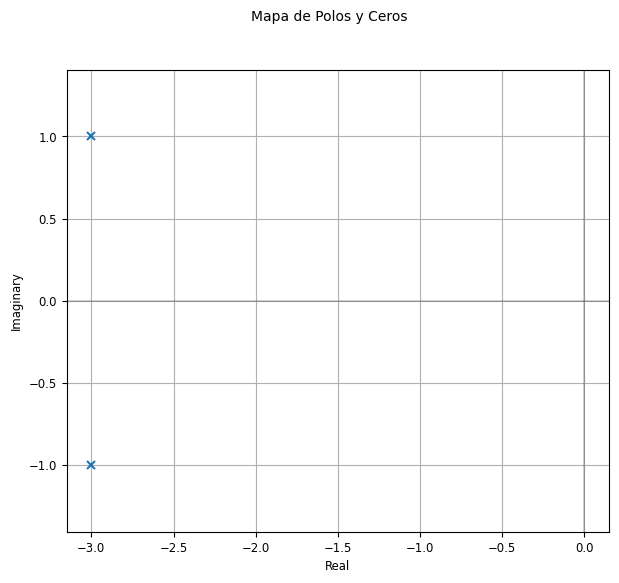

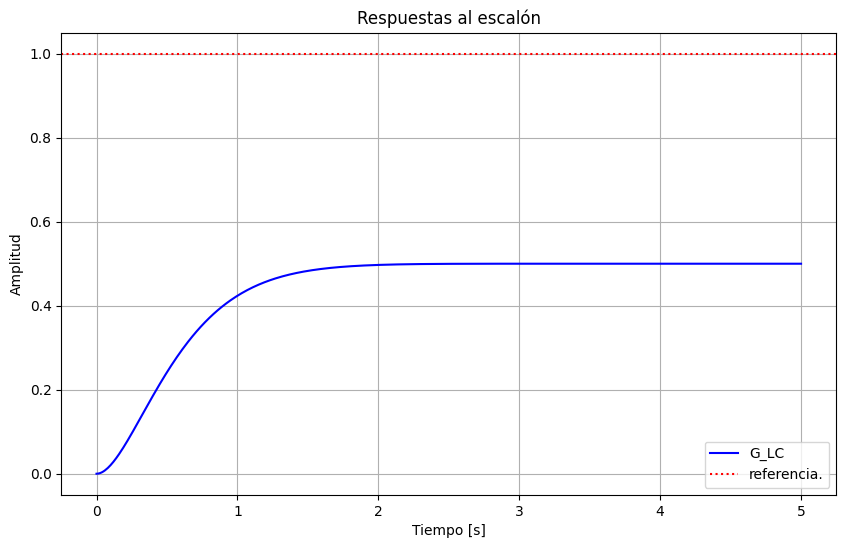

Métricas de desempeño del sistema con controlador Proporcional-Derivativo:
  - Sobreimpulso (Overshoot): 0.00%
  - Tiempo de establecimiento (SettlingTime): 1.67 s
  - Valor final: 0.5000
  - Error en estado estacionario (1 - valor_final): 0.5000


In [12]:
numl = [5]
denl = [1,6,10]
# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
G_LC = ct.tf(numl, denl)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia es:")
print(G_LC)

polos = ct.poles(G_LC)
zeros = ct.zeros(G_LC)
# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polos)
print(zeros)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(G_LC, title='Mapa de Polos y Ceros')
plt.grid(True)
plt.show()

#grafica respuesta escalon unitario
t = np.linspace(0, 5, 501)
t, y_base = ct.step_response(G_LC, T=t)
plt.figure(figsize=(10,6))
plt.plot(t, y_base  , label="G_LC", color='blue')
plt.axhline(y=1, color="r",linestyle=":",label="referencia.")
plt.title("Respuestas al escalón")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema con controlador Proporcional-Derivativo:")
info = ct.step_info(G_LC)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = y_base[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")



Función de Transferencia del sistema de lazo cerrado con controlador Proporcional-Integral-Diferencial:
<TransferFunction>: sys[580]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     15 s^2 + 80 s + 95
  ------------------------
  s^3 + 21 s^2 + 90 s + 95


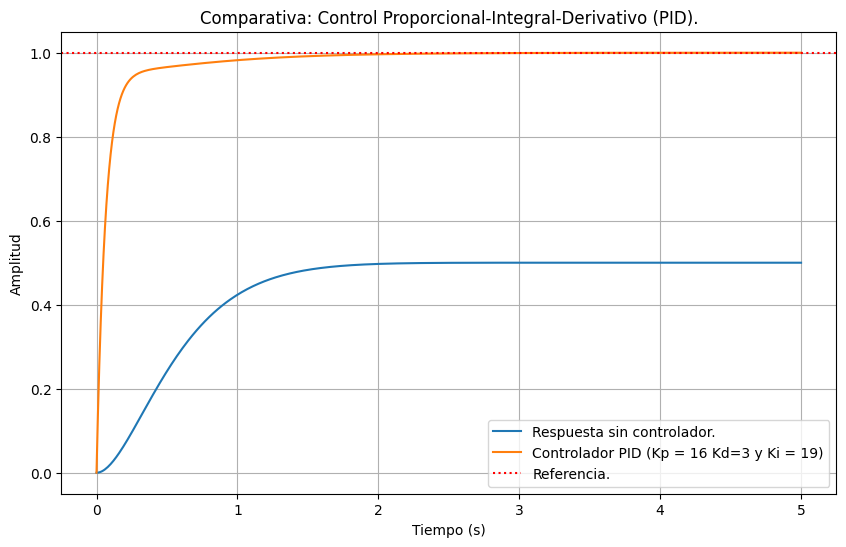

Métricas de desempeño del sistema con controlador Proporcional-Integral:
  - Sobreimpulso (Overshoot): 0.00%
  - Tiempo de Establecimiento (SettlingTime): 0.92 s
  - Valor final: 1.0000
  - Error en estado estacionario (1 - valor_final): 0.0000


In [92]:
# --- Parámetros del controlador Proporcional-Integral-Derivativo. ---
Kp_pid = 16
Ki = 19
kd_pid= 3
# --- Creación del controlador PI. ---
# El numerador es [kd, Kp, Ki] y el denominador es [1, 0] (representando 1/s).
Gc_PID = ct.tf([kd_pid, Kp_pid, Ki], [1, 0])

# --- Sistema en lazo cerrado con controlador PID. ---
sistema_PID = ct.feedback(Gc_PID * G_LC, 1)
print("Función de Transferencia del sistema de lazo cerrado con controlador Proporcional-Integral-Diferencial:")
print(sistema_PID)

# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 5, 501)
t, y_PID = ct.step_response(sistema_PID, T=t)

# --- Graficación de la respuesta base. ---
plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
plt.plot(t, y_PID, label=f"Controlador PID (Kp = {Kp_pid} Kd={kd_pid} y Ki = {Ki})")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Comparativa: Control Proporcional-Integral-Derivativo (PID).")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema con controlador Proporcional-Integral:")
info = ct.step_info(sistema_PID)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de Establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = y_PID[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")


Para definir los valores lo primero que hice fue aumentar los valores de Kp y Ki, al contrario con el Kd que lo disminui para poder frenar las oscilaciones que producian las otras variables, consiguiendo un error y un sobreimpulso de 0, y un tiempo de establecimiento de 1.03 con valores de 14,15,3 de Kp,Ki, y Kd respectivamente. Al aumentar el Ki= 16 para dejar el error en 0 y el Kp=19 para la velocidad de respuesta obtuve los datos requeridos.


$$G_{LCPID}(s)= \frac{G_p(s)*Gcpid}{1+G_p(s)*Gcpid}$$
$$ G_{LCPID}(s)= \frac{\frac{5}{s^2+6s+5}*\frac{kds^2* Kp* Kis}{s}}{1+(\frac{5}{s^2+6s+5}*\frac{kds^2* Kp*Kis}{s})}$$
$$ G_{LCPID}(s)= \frac{\frac{5kds^2*5Kp* 5Kis}{s^3+6s^2+5s}}{1+\frac{5kds^2*5Kp* 5Kis}{s^3+6s^2+5s}}$$
$$ G_{LCPID}(s)= \frac{\frac{5kds^2*5Kp* 5Kis}{s^3+6s^2+5s}}{\frac{(5kds^2*5Kp* 5Kis)+s^3+6s^2+5s}{s^3+6s^2+5s}}$$
$$ G_{LCPID}(s)= \frac{5kds^2*5Kp* 5Kis}{(5kds^2*5Kp* 5Kis)+s^3+6s^2+5s}$$

Sustituyendo los valores

$$ G_{LCPID}(s)= \frac{15*s^2*80* 95*s}{(15*s^2*80* 95*s)+s^3+6s^2+5s}$$ 


<TransferFunction>: sys[604]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     15 s^2 + 80 s + 95
  ------------------------
  s^3 + 21 s^2 + 85 s + 95
Las raíces de s (polos) son:
[-16.08187005+0.j  -2.8328662 +0.j  -2.08526375+0.j]
[-3.54858377+0.j -1.78474956+0.j]


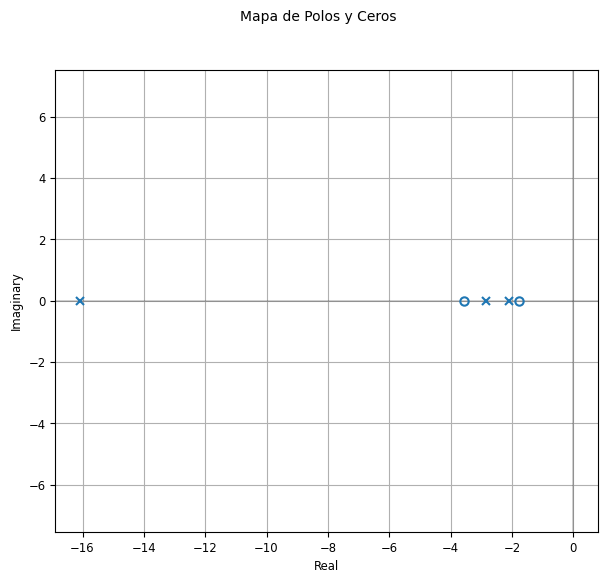

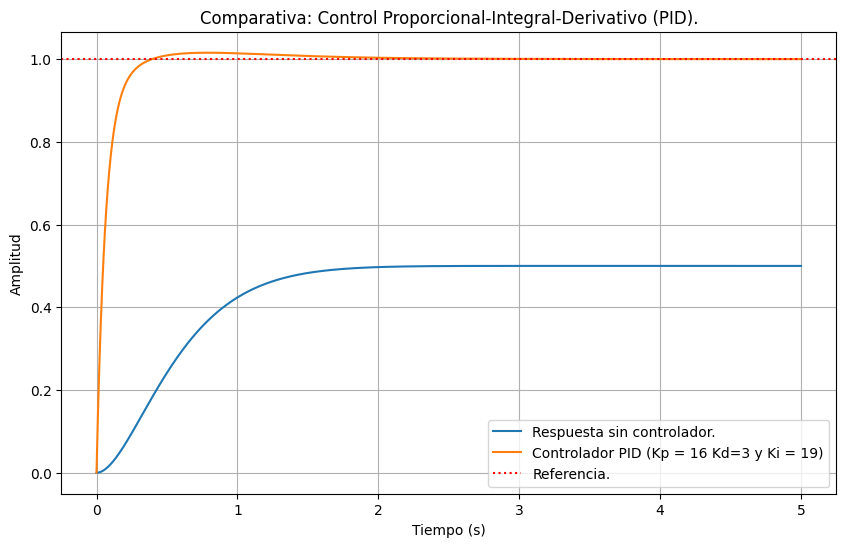

Métricas de desempeño del sistema con controlador Proporcional-Integral-Derivativo:
  - Sobreimpulso (Overshoot): 1.54%
  - Tiempo de Establecimiento (SettlingTime): 0.29 s
  - Valor final: 1.0000
  - Error en estado estacionario (1 - valor_final): 0.0000


In [95]:
Kp_pid = 16
Ki = 19
kd_pid= 3

num = [5]
den = [1,6,5]
# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
Gp = ct.tf(num, den)

Gc_PID = ct.tf([kd_pid, Kp_pid, Ki], [1, 0])
sis_PID = ct.feedback(Gc_PID * Gp, 1)
print(sis_PID)

polospid = ct.poles(sis_PID)
zerospid = ct.zeros(sis_PID)
# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polospid)
print(zerospid)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sis_PID, title='Mapa de Polos y Ceros')
plt.grid(True)
plt.show()


t = np.linspace(0, 5, 501)
t, y_PID2 = ct.step_response(sis_PID,T=t)

# --- Graficación de la respuesta base. ---
plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
#plt.plot(t, y_P, label=f"Controlador P (Kp = {Kp})")
plt.plot(t, y_PID2, label=f"Controlador PID (Kp = {Kp_pid} Kd={kd_pid} y Ki = {Ki})")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Comparativa: Control Proporcional-Integral-Derivativo (PID).")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()
# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema con controlador Proporcional-Integral-Derivativo:")
info = ct.step_info(sis_PID)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de Establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = y_PID[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")


